In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
file_path = 'Iris.csv'
iris_df = pd.read_csv(file_path)



In [3]:
label_encoder = LabelEncoder()
iris_df['Species'] = label_encoder.fit_transform(iris_df['Species'])


In [4]:
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']

Text(0.5, 1.0, 'Sepal Features')

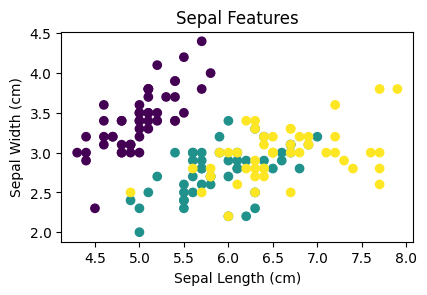

In [5]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(X['SepalLengthCm'], X['SepalWidthCm'], c=y, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Features')

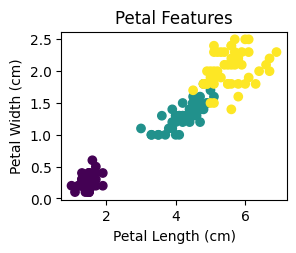

In [6]:
plt.subplot(2, 2, 2)
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'], c=y, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Features')

plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {'n_neighbors': np.arange(1, 21)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_k}")

Best k value: 1


In [9]:
from sklearn.preprocessing import label_binarize

y_train_binarized = label_binarize(y_train, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
y_test_binarized = label_binarize(y_test, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])


In [10]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [11]:
y_probs = knn_best.predict_proba(X_test)

In [12]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [13]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

c:\Users\rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [15]:
from itertools import cycle
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])

<Figure size 800x600 with 0 Axes>

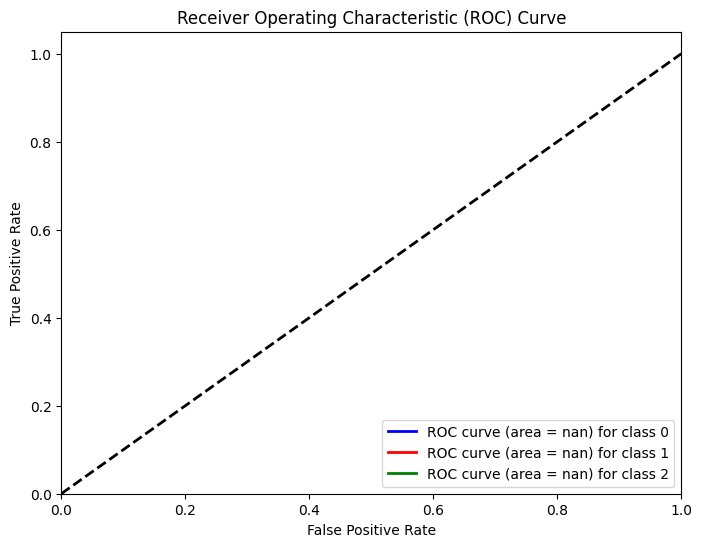

In [17]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [18]:
y_pred = knn_best.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_mat)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

